### Some references
https://github.com/pytorch/torchcodec 


https://github.com/dmlc/decord

In [1]:
#import torch
#from torchcodec.decoders import VideoDecoder
#import ffmpeg
#from decord import VideoReader
#from decord import cpu, gpu
from datasets import load_dataset
import matplotlib.pyplot as plt

/work/vajira/anaconda3/envs/pytorch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_online = load_dataset("sperm-net/VISEM", trust_remote_code=True)

Generating fold_01 split: 2 examples [00:00, 55.03 examples/s]
Generating fold_02 split: 2 examples [00:00, 78.14 examples/s]


In [3]:
ds_online

DatasetDict({
    fold_01: Dataset({
        features: ['video', 'Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)', 'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)', 'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1', 'Serum C18:2 n-6 (linoleic acid, LA)', 'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9', 'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6', 'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)', 'Serum C22:5 n-3 (docosapentaenoic acid, DPA)', 'Serum C22:6 n-3 (docosahexaenoic acid, DHA)', 'Sperm C14:0 (myristic acid)', 'Sperm C15:0 (pentadecanoic acid)', 'Sperm C16:0 (palmitic acid)', 'Sperm C16:1 n-7 (palmitoleic acid)', 'Sperm C17:0', 'Sperm C18:0 (stearic acid)', 'Sperm C18:1 trans n-6 to n-11', 'Sperm C18:1 n-9 (oleic acid)', 'Sperm C18:1 n-7 to n-11', 'Sperm C18:2 n-6 (Linoleic acid, LA)', 'Sperm C20:0', 'Sperm C18:3 n-6 (gamma-linoleic acid, GLA)', 'Sperm C18:3 n-3 (a-linoleic acid, ALA)', 'Sperm C20:1 n-9', 'Sperm C20:2 n-6'

In [8]:
ds_online['fold_01'][1]['Serum C14:0 (myristic acid)']

'0,28'

In [2]:
ds = load_dataset("videofolder", data_dir="/global/D1/homes/vajira/data/sperm/visem/visem-dataset/videos")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['video', 'Serum C14:0 (myristic acid)', 'Serum C16:0 (palmitic acid)', 'Serum C16:1 (palmitoleic acid)', 'Serum C18:0 (stearic acid)', 'Serum C18:1 n-9 (oleic acid)', 'Serum total C18:1', 'Serum C18:2 n-6 (linoleic acid, LA)', 'Serum C18:3 n-6 (gamma-linoleic acid, GLA)', 'Serum C20:1 n-9', 'Serum C20:2 n-6', 'Serum C20:3 n-6', 'Serum C20:4 n-6', 'Serum C20:5 n-3  (eicosapentaenoic acid, EPA)', 'Serum C22:5 n-3 (docosapentaenoic acid, DPA)', 'Serum C22:6 n-3 (docosahexaenoic acid, DHA)', 'Sperm C14:0 (myristic acid)', 'Sperm C15:0 (pentadecanoic acid)', 'Sperm C16:0 (palmitic acid)', 'Sperm C16:1 n-7 (palmitoleic acid)', 'Sperm C17:0', 'Sperm C18:0 (stearic acid)', 'Sperm C18:1 trans n-6 to n-11', 'Sperm C18:1 n-9 (oleic acid)', 'Sperm C18:1 n-7 to n-11', 'Sperm C18:2 n-6 (Linoleic acid, LA)', 'Sperm C20:0', 'Sperm C18:3 n-6 (gamma-linoleic acid, GLA)', 'Sperm C18:3 n-3 (a-linoleic acid, ALA)', 'Sperm C20:1 n-9', 'Sperm C20:2 n-6', 

In [32]:
ds["train"][84]["Serum C14:0 (myristic acid)"]

'0,28'

In [25]:
frame = ds["train"][0]

In [19]:
frame

<decord.NDArray shape=(480, 640, 3), cpu(0)>
array([[[119, 120, 111],
        [118, 119, 110],
        [130, 118, 108],
        ...,
        [ 95,  92,  95],
        [ 95,  92,  95],
        [ 95,  92,  95]],

       [[112, 112,  98],
        [115, 115, 101],
        [131, 116, 105],
        ...,
        [ 95,  92,  95],
        [ 95,  92,  95],
        [ 95,  92,  95]],

       [[109, 104,  88],
        [115, 110,  94],
        [129, 113, 101],
        ...,
        [ 96,  93,  96],
        [ 95,  92,  95],
        [ 95,  92,  95]],

       ...,

       [[100,  99, 101],
        [111, 110, 112],
        [117, 114, 117],
        ...,
        [129, 121, 104],
        [129, 121, 102],
        [127, 119, 100]],

       [[101, 100, 104],
        [113, 112, 116],
        [118, 115, 120],
        ...,
        [119, 107,  97],
        [119, 107,  95],
        [119, 107,  95]],

       [[104, 103, 107],
        [117, 116, 120],
        [120, 117, 122],
        ...,
        [116, 103,  98],
    

In [23]:
# ndarray to np array
frame = frame.asnumpy()

In [20]:
import numpy as np

# Assuming 'image_data' is your image array
# Convert the image data to a numerical format, e.g., float32
image_data = np.array(frame, dtype=np.float32)

# Now you can process the image data without the TypeError

TypeError: float() argument must be a string or a real number, not 'NDArray'

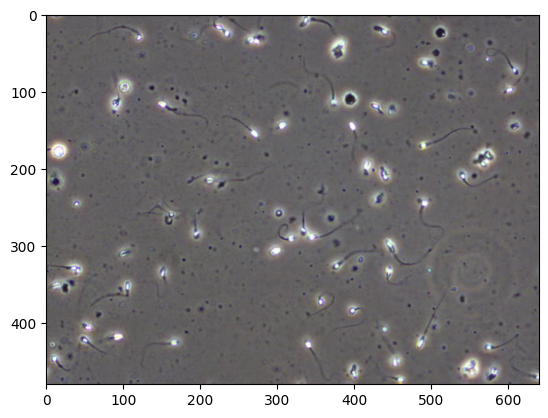

In [24]:
# display the first frame
plt.imshow(frame)

In [5]:
ds["train"][0]["text"]

KeyError: 'text'

In [9]:
#vr = VideoReader('/global/D1/homes/vajira/data/sperm/visem/visem-dataset/videos/1.avi', ctx=cpu(0))

In [10]:
#en(vr)

In [13]:
vr

In [21]:
test = ds["test"][0]["video"]

In [22]:
test

In [23]:
len(test)

12132

In [11]:
ds["train"][0]

{'video': <decord.video_reader.VideoReader at 0x1553c00c7580>}

In [7]:
test = VideoReader(ds["train"][0]["video"], ctx=cpu(0))

TypeError: Don't know how to handle type <class 'decord.video_reader.VideoReader'>

In [2]:
stream = ffmpeg.input('/global/D1/homes/vajira/data/sperm/visem/visem-dataset/videos/1.avi')

AttributeError: module 'ffmpeg' has no attribute 'input'

In [1]:
torch.__version__

NameError: name 'torch' is not defined

In [8]:
torch.cuda.device_count()

1

In [11]:
from datasets import load_dataset
#from torchcodec.decoders import VideoDecoder

In [12]:
#from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("sperm-net/VISEM")

In [4]:
#vr = VideoReader('/global/D1/homes/vajira/data/sperm/visem/visem-dataset/videos/1.avi', ctx=cpu(0))

In [17]:
ds["train"][0]["video"][0].shape


(480, 640, 3)